### Feature Details:

`instance_id`: A unique identifier for each instance in the dataset, represented as a floating-point number. There are 50,000 instances in total

`artist_name`: The name of the artist who created the track, represented as a string (object).

`track_name`: The name of the track, represented as a string (object

`popularity`: A measure of the popularity of the track, represented as a floating-point number between 0 and 100. Higher values indicate greater popularity.

`acousticness`: A measure of the acousticness of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater acousticness.

`danceability`: A measure of the danceability of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater danceability.

`duration_ms`: The duration of the track in milliseconds, represented as a floating-point number.

`energy`: A measure of the energy of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater energy.

`instrumentalness`: A measure of the instrumentalness of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater instrumentalness.

`key`: The key in which the track is performed, represented as a string (object). There are 12 possible values: 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', and 'B'.

`liveness`: A measure of the liveness of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater liveness.

`loudness`: A measure of the loudness of the track, represented as a floating-point number in decibels (dB). Higher values indicate greater loudness.

`mode`: The mode in which the track is performed, represented as a string (object). There are two possible values: 'major' and 'minor'.

`speechiness`: A measure of the speechiness of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater speechiness.

`tempo`: The tempo of the track in beats per minute (BPM), represented as a string (object).

`obtained_date`: The date on which the track information was obtained, represented as a string (object).

`valence`: A measure of the valence (positivity) of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater positivity.

#### `music_genre`: The genre of the track, represented as a string (object). There are multiple possible genres in the dataset.

In [316]:
#Import Libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

import re

# import xgboost as xgb

In [317]:
df = pd.read_csv("C:/Users/lenovo/Desktop/ML Project DataKlub 2/music_genre.csv")

In [318]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [319]:
df.shape

(50005, 18)

In [320]:
df.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [322]:
df.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [323]:
df = df.drop_duplicates()

In [324]:
df.shape

(50001, 18)

In [325]:
df.isnull().sum()

instance_id         1
artist_name         1
track_name          1
popularity          1
acousticness        1
danceability        1
duration_ms         1
energy              1
instrumentalness    1
key                 1
liveness            1
loudness            1
mode                1
speechiness         1
tempo               1
obtained_date       1
valence             1
music_genre         1
dtype: int64

In [326]:
df.dropna(inplace=True)

In [327]:
df.shape

(50000, 18)

In [328]:
df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [329]:
## let's drop the id column which won't contribute to the model using domain knowledge.
df.drop(['instance_id'], axis=1, inplace=True)

In [330]:
# data variables are object ar boolean

cat_cols = list(df.dtypes[df.dtypes == 'object'].index)
print(f'Columns with categorical variables are: {cat_cols} \n')
print(f'Categorical Features: {len(cat_cols)} \n')


num_cols = list(df.dtypes[df.dtypes == 'float64'].index)
print(f'Columns with numerical values are: {num_cols} \n')
print(f'Numerical Features: {len(num_cols)}')

Columns with categorical variables are: ['artist_name', 'track_name', 'key', 'mode', 'tempo', 'obtained_date', 'music_genre'] 

Categorical Features: 7 

Columns with numerical values are: ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence'] 

Numerical Features: 10


Tempo should be continuous and not object.
Hence, remove all values with "?"

In [331]:
df.tempo.value_counts()

tempo
?                     4980
140.007                 17
120.0                   17
100.00299999999999      16
100.014                 15
                      ... 
137.046                  1
136.378                  1
93.041                   1
113.98200000000001       1
99.20100000000001        1
Name: count, Length: 29394, dtype: int64

In [332]:
df[df["tempo"] == "?"]

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
5,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.6140,Electronic
32,PEEKABOO,Arrival,45.0,0.02330,0.729,274286.0,0.869,0.585000,F,0.0944,-7.569,Minor,0.1290,?,4-Apr,0.1380,Electronic
35,Fabian Mazur,If U Wanted To,33.0,0.10800,0.493,-1.0,0.682,0.000000,A,0.1960,-5.781,Minor,0.2870,?,4-Apr,0.2390,Electronic
36,Wax Tailor,The Games You Play,45.0,0.04780,0.646,253333.0,0.649,0.002520,G,0.3530,-5.259,Major,0.1170,?,4-Apr,0.7270,Electronic
39,Dahu,Vessel,37.0,0.20300,0.769,429941.0,0.551,0.882000,A#,0.1090,-12.520,Minor,0.0408,?,4-Apr,0.0618,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49918,Big Sean,Bigger Than Me,58.0,0.29600,0.379,292520.0,0.644,0.000000,A#,0.3130,-7.933,Minor,0.1120,?,5-Apr,0.1440,Hip-Hop
49964,Millonario,Rayas de Patrón,59.0,0.08470,0.929,215200.0,0.737,0.000000,G#,0.8610,-6.424,Major,0.1020,?,4-Apr,0.8860,Hip-Hop
49967,MadeinTYO,I Want (feat. 2 Chainz),62.0,0.17900,0.860,233293.0,0.625,0.000136,D,0.3000,-6.922,Major,0.1050,?,4-Apr,0.2210,Hip-Hop
49976,Big Sean,Sunday Morning Jetpack,52.0,0.70000,0.462,225067.0,0.741,0.000000,A#,0.3400,-8.008,Minor,0.1620,?,4-Apr,0.5890,Hip-Hop


Also, we need to drop "?" values in the tempo column since we cannot ascribe it with something else.¶
Then convert it to a float

In [333]:
df = df.drop(df[df["tempo"] == "?"].index)

df["tempo"] = df["tempo"].astype("float64")

In [334]:
df.dtypes

artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
obtained_date        object
valence             float64
music_genre          object
dtype: object

In [335]:
df.shape

(45020, 17)

In [336]:
df.head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [337]:
# data variables are object ar boolean

cat_cols = list(df.dtypes[df.dtypes == 'object'].index)
print(f'Columns with categorical variables are: {cat_cols} \n')
print(f'Categorical Features: {len(cat_cols)} \n')


num_cols = list(df.dtypes[df.dtypes == 'float64'].index)
print(f'Columns with numerical values are: {num_cols} \n')
print(f'Numerical Features: {len(num_cols)}')

Columns with categorical variables are: ['artist_name', 'track_name', 'key', 'mode', 'obtained_date', 'music_genre'] 

Categorical Features: 6 

Columns with numerical values are: ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'] 

Numerical Features: 11


## Data Visualization

### For categorical variables

Text(0.5, 1.0, 'Number of Music Genres Provided')

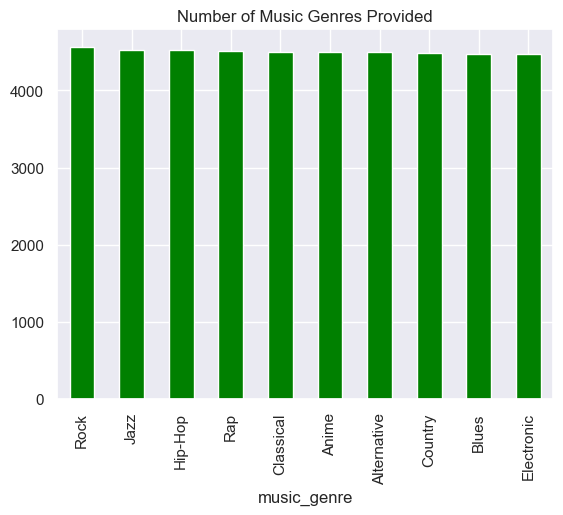

In [338]:
df['music_genre'].value_counts().plot(kind='bar', color='green')
plt.title('Number of Music Genres Provided')

### Artist Names

Some names were not provided for some artists, which could have bettered performance i.e. empty_field.
Hence we remove them

In [299]:
df['artist_name'].value_counts()

artist_name
empty_field                2229
Nobuo Uematsu               387
Wolfgang Amadeus Mozart     365
Ludwig van Beethoven        287
Johann Sebastian Bach       286
                           ... 
The Harptones                 1
Ma Rainey                     1
Phonte                        1
Ronnie Lovejoy                1
Powers Pleasant               1
Name: count, Length: 6603, dtype: int64

In [300]:
df = df[df['artist_name'] != 'empty_field']

In [301]:
group_artist = df.groupby('music_genre')['artist_name'].value_counts()
group_df = group_artist.reset_index()

In [302]:
group_df.head()

,music_genre,artist_name,count
0,Alternative,Five Finger Death Punch,36
1,Alternative,Red Hot Chili Peppers,35
2,Alternative,Gorillaz,34
3,Alternative,Linkin Park,34
4,Alternative,Radiohead,33


#### Genre of music are artists Known for

music_genre
Anime           327
Classical       531
Electronic      550
Country         741
Blues           746
Rap             755
Hip-Hop         807
Alternative    1117
Jazz           1154
Rock           1390
Name: artist_name, dtype: int64


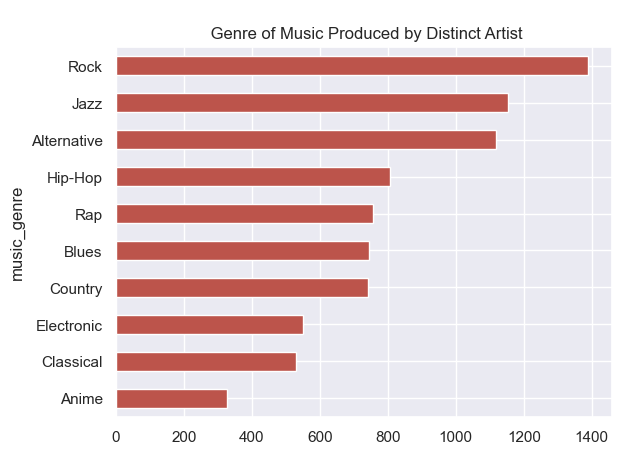

In [303]:
colors = ["#bc544b"]
sns.set_palette(colors)

arti_df = group_df.groupby('music_genre')['artist_name'].count().sort_values()
print(arti_df)
arti_df.plot(kind='barh')
plt.title('\n Genre of Music Produced by Distinct Artist')
plt.show()

`Most of the artists produce 'Rock Music'`

In [304]:
li = group_df['music_genre'].unique()
for i in li:
    top_10 = group_df[group_df['music_genre'] == i][:10]
    print(top_10)
    print('------\n')
        

   music_genre              artist_name  count
0  Alternative  Five Finger Death Punch     36
1  Alternative    Red Hot Chili Peppers     35
2  Alternative                 Gorillaz     34
3  Alternative              Linkin Park     34
4  Alternative                Radiohead     33
5  Alternative           The Black Keys     31
6  Alternative        The Neighbourhood     30
7  Alternative        Avenged Sevenfold     29
8  Alternative   Florence + The Machine     28
9  Alternative                 Slipknot     28
------

     music_genre               artist_name  count
1117       Anime             Nobuo Uematsu    357
1118       Anime         Capcom Sound Team    150
1119       Anime              Yuki Hayashi    148
1120       Anime  ASIAN KUNG-FU GENERATION     75
1121       Anime          Ryuichi Sakamoto     69
1122       Anime              Kevin Penkin     64
1123       Anime           Bruce Faulconer     63
1124       Anime            Austin Wintory     62
1125       Anime         

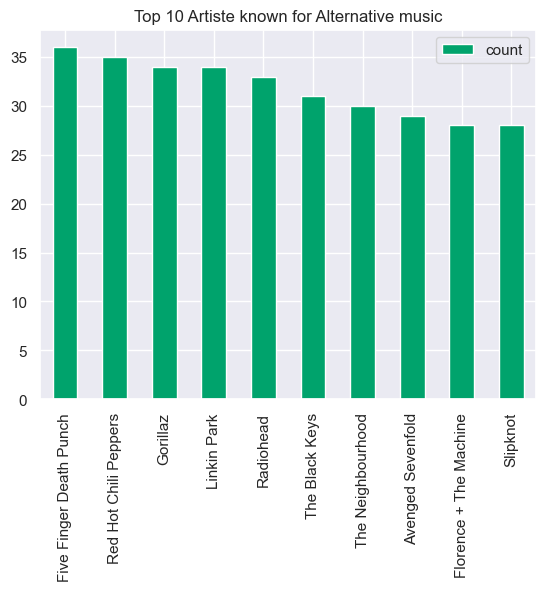

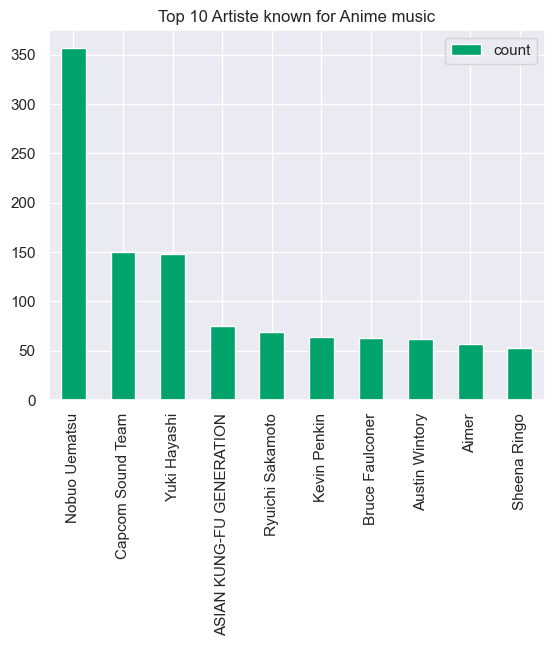

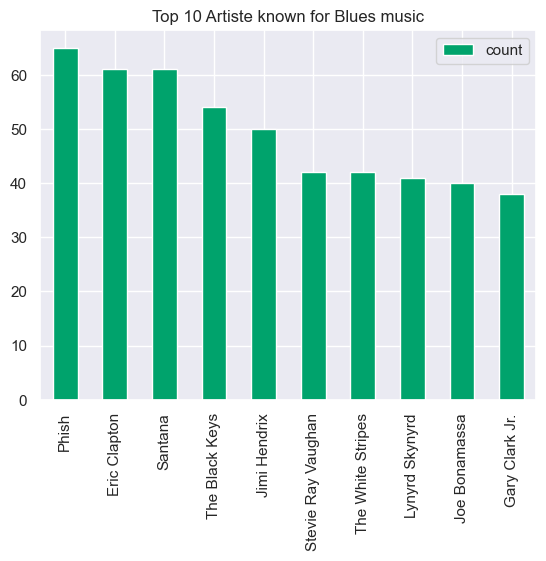

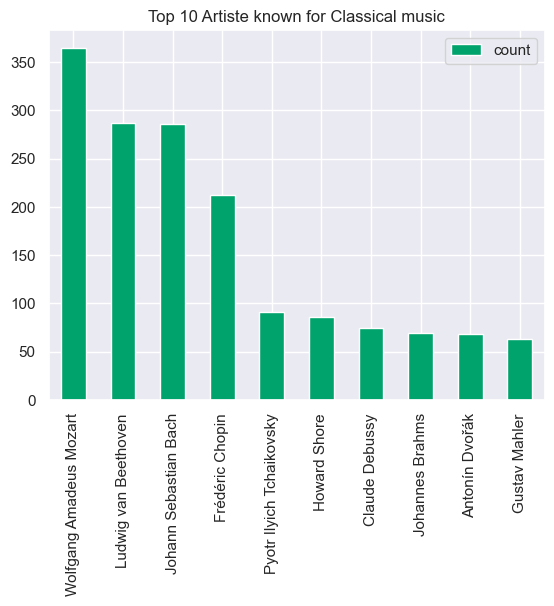

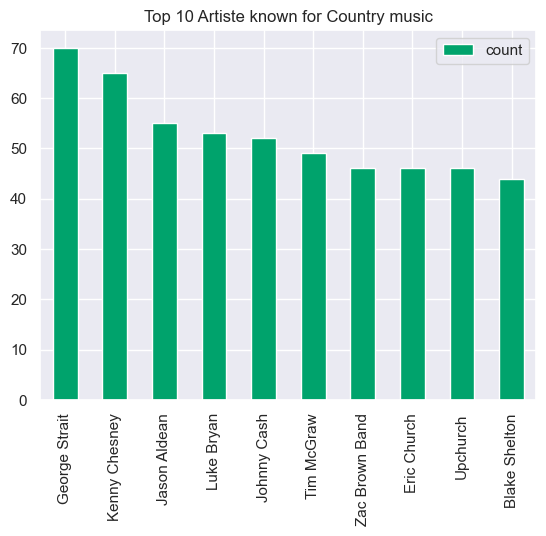

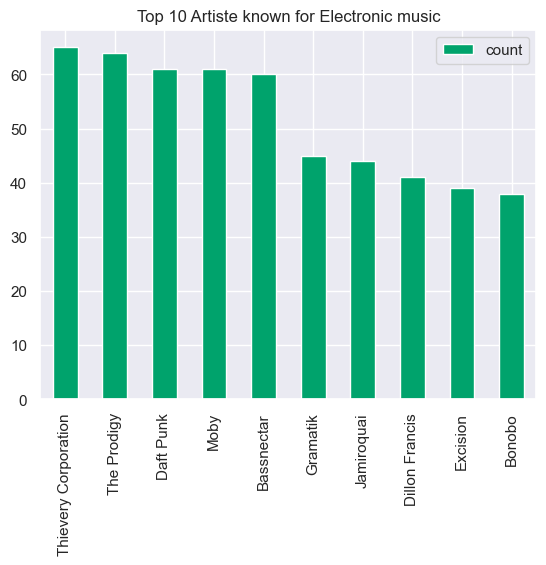

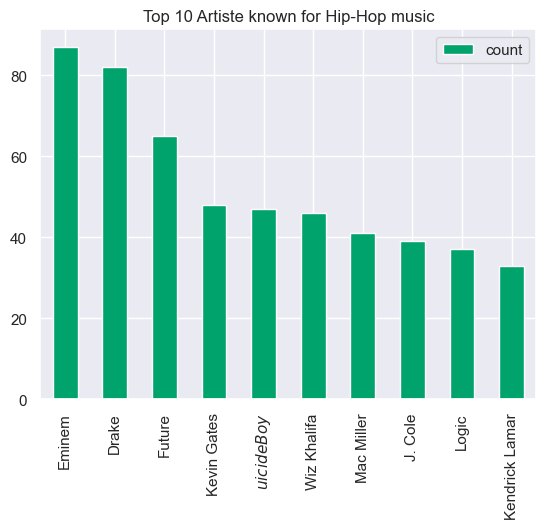

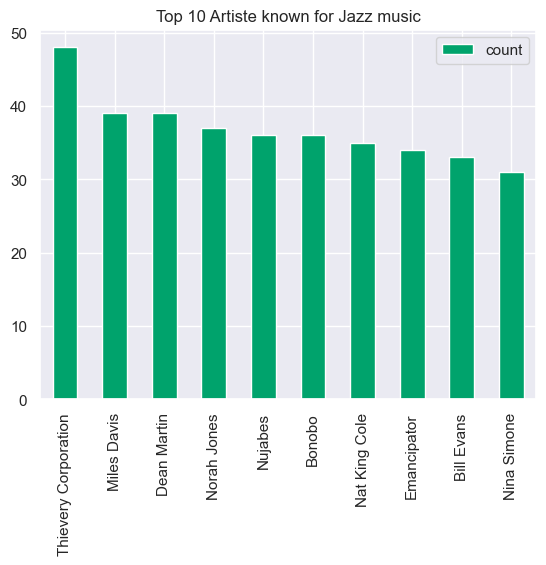

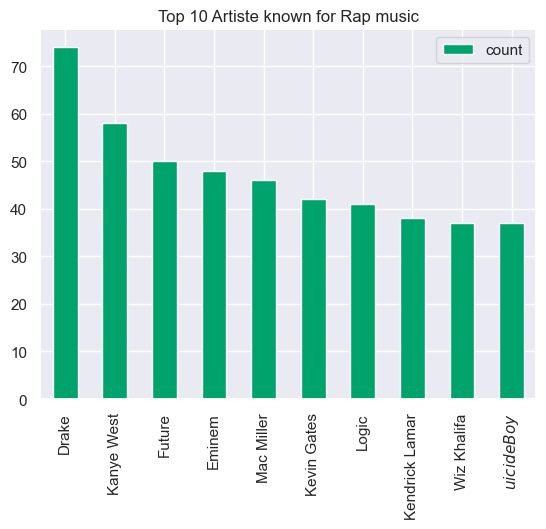

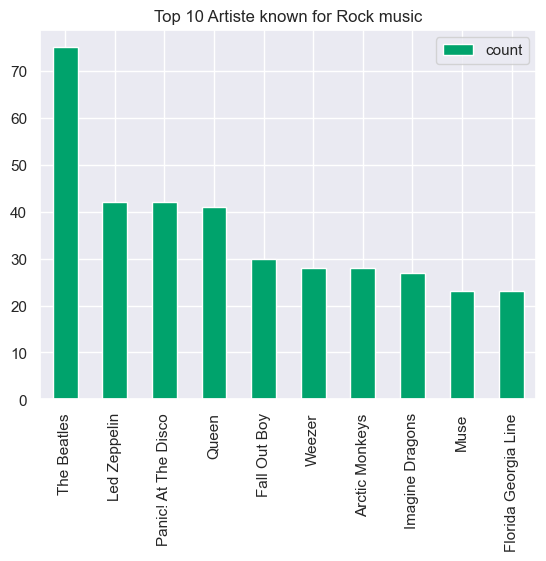

In [305]:
colors = ["#00A36C"]
sns.set_palette(colors)

li = group_df['music_genre'].unique()
for i in li:
    top_10 = group_df[group_df['music_genre'] == i][:10]
    top_10.plot(x='artist_name', kind='bar')
    genre = top_10["music_genre"].values[0]
    plt.title(f'Top 10 Artiste known for {genre} music')
    plt.xlabel("")

#### `Observation: Top 10 artiste for all music genre seems to be different except for 'Hip-Hop Music' and 'Rap Music' who share similar artist. The categorical feature of "artiste_name" will definitely help in prediction`

#### Mode

In [306]:
df_mode = df[['mode', 'music_genre']]

mode
Major    0.64121
Minor    0.35879
Name: proportion, dtype: float64


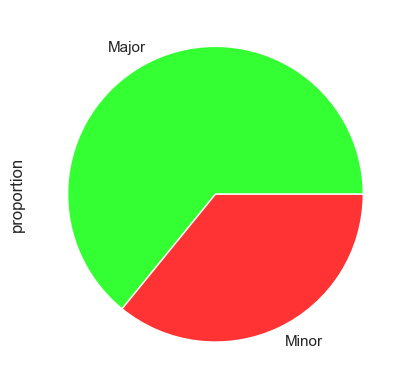

In [307]:
colors = ["#33ff33", "#ff3333"]
sns.set_palette(colors)

mode_co = df_mode['mode'].value_counts(normalize=True)

print(mode_co)
mode_co.plot(kind="pie")
plt.show()

mode   music_genre
Major  Country        0.136162
       Rock           0.117173
       Blues          0.110030
       Classical      0.103360
       Alternative    0.098112
       Anime          0.095852
       Hip-Hop        0.087324
       Rap            0.085721
       Electronic     0.083424
       Jazz           0.082841
Minor  Jazz           0.133199
       Electronic     0.128900
       Rap            0.124992
       Hip-Hop        0.124275
       Anime          0.105777
       Alternative    0.101348
       Classical      0.092555
       Blues          0.079463
       Rock           0.073536
       Country        0.035954
Name: proportion, dtype: float64



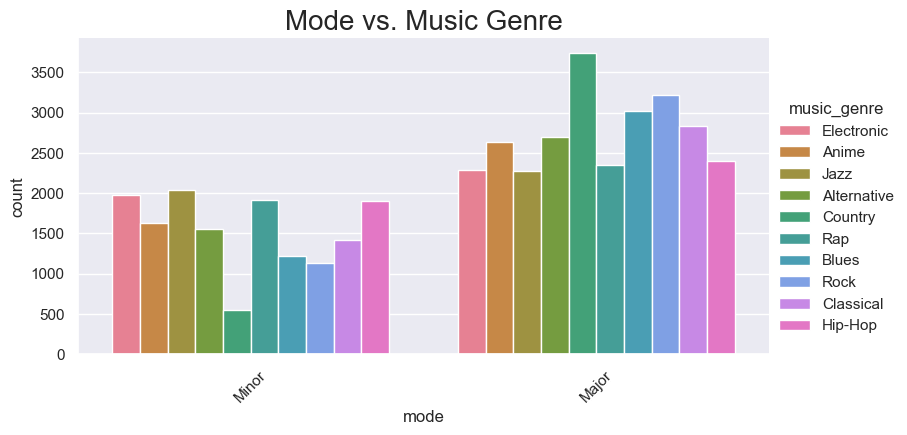

In [308]:
colors = ["#33ff33", "#ff3333"]
sns.set_palette(colors)

print(df_mode.groupby('mode')['music_genre'].value_counts(normalize=True))
print('')

sns.catplot(x='mode',kind='count', hue='music_genre', data=df_mode, height=4, aspect=2)
# plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Mode vs. Music Genre', size=20)
plt.show()

#### Key

In [309]:
df_key = df[['key', 'music_genre']]

key
G     4873
C     4717
C#    4662
D     4475
A     4167
F     3696
B     3236
E     3204
G#    2894
A#    2854
F#    2652
D#    1361
Name: count, dtype: int64


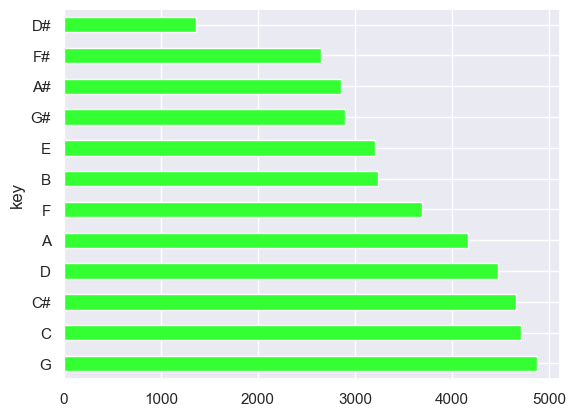

In [310]:
key_co = df_key['key'].value_counts()

print(key_co)
key_co.plot(kind="barh")
plt.show()

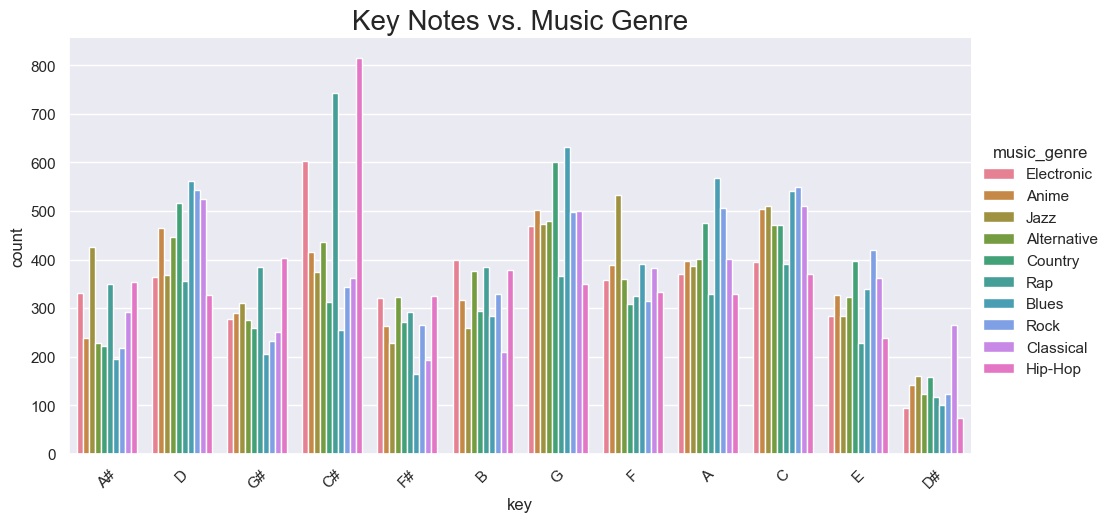

In [311]:
colors = ["#33ff33", "#ff3333"]
sns.set_palette(colors)

# print(df_key.groupby('key')['music_genre'].value_counts(normalize=True))
# print('')

sns.catplot(x='key',kind='count', hue='music_genre', data=df_key, height=5, aspect=2)
# plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Key Notes vs. Music Genre', size=20)
plt.show()

### For numerical variables

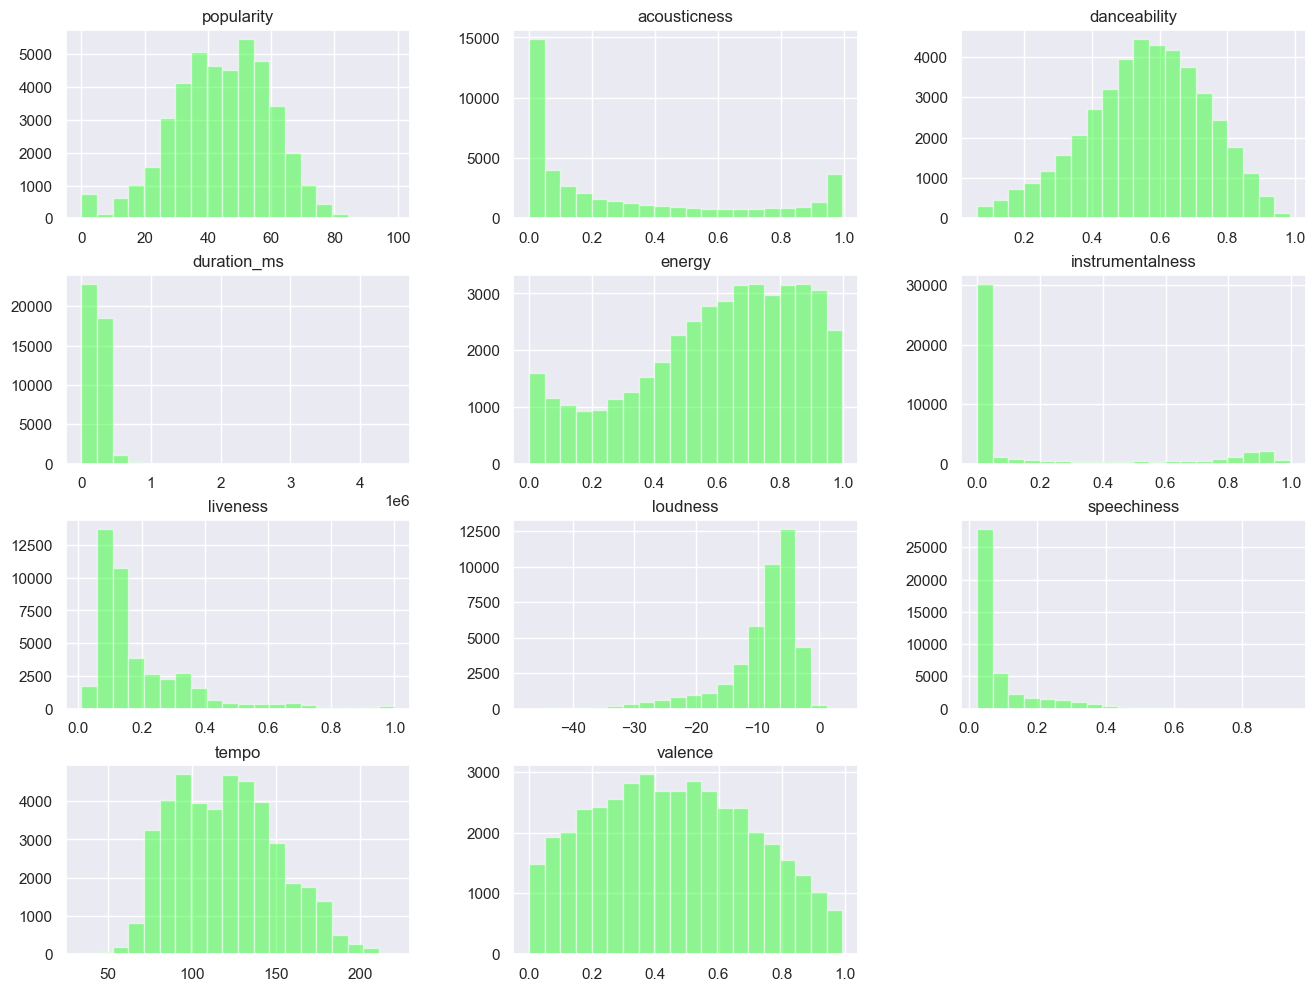

In [312]:
df[num_cols].hist(bins=20, alpha=0.5, figsize=(16,12))
plt.show()

### How Features Aggregate against Target Variable

In [313]:
df.groupby("music_genre")[num_cols].mean()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
music_genre,,,,,,,,,,,
Alternative,50.211158,0.164812,0.543529,210813.603107,0.710337,0.060287,0.196137,-6.534665,0.089384,122.664370,0.448987
Anime,24.233662,0.285357,0.470626,209341.482134,0.667210,0.280127,0.195186,-7.920903,0.065281,126.775148,0.436106
Blues,34.802076,0.315982,0.527361,229936.421090,0.611273,0.094187,0.232622,-8.973439,0.061989,121.430479,0.579869
Classical,29.206953,0.870784,0.306074,277797.993892,0.175975,0.601651,0.162268,-21.586745,0.051435,104.005558,0.210817
Country,45.995336,0.268280,0.577580,195771.854244,0.638426,0.005559,0.186685,-7.307227,0.049092,123.788609,0.537613
Electronic,38.130272,0.122675,0.619726,242349.335989,0.737691,0.350586,0.210024,-7.063531,0.099280,126.024700,0.389863
Hip-Hop,58.393587,0.177098,0.717419,198750.196329,0.644960,0.010750,0.201012,-6.842055,0.206923,119.972795,0.475627
Jazz,40.921491,0.495097,0.586102,237404.441871,0.474921,0.355039,0.172606,-11.167702,0.074491,111.699778,0.510451
Rap,60.531726,0.170795,0.698166,196088.349333,0.651029,0.009567,0.196610,-6.680386,0.186269,120.697278,0.454550


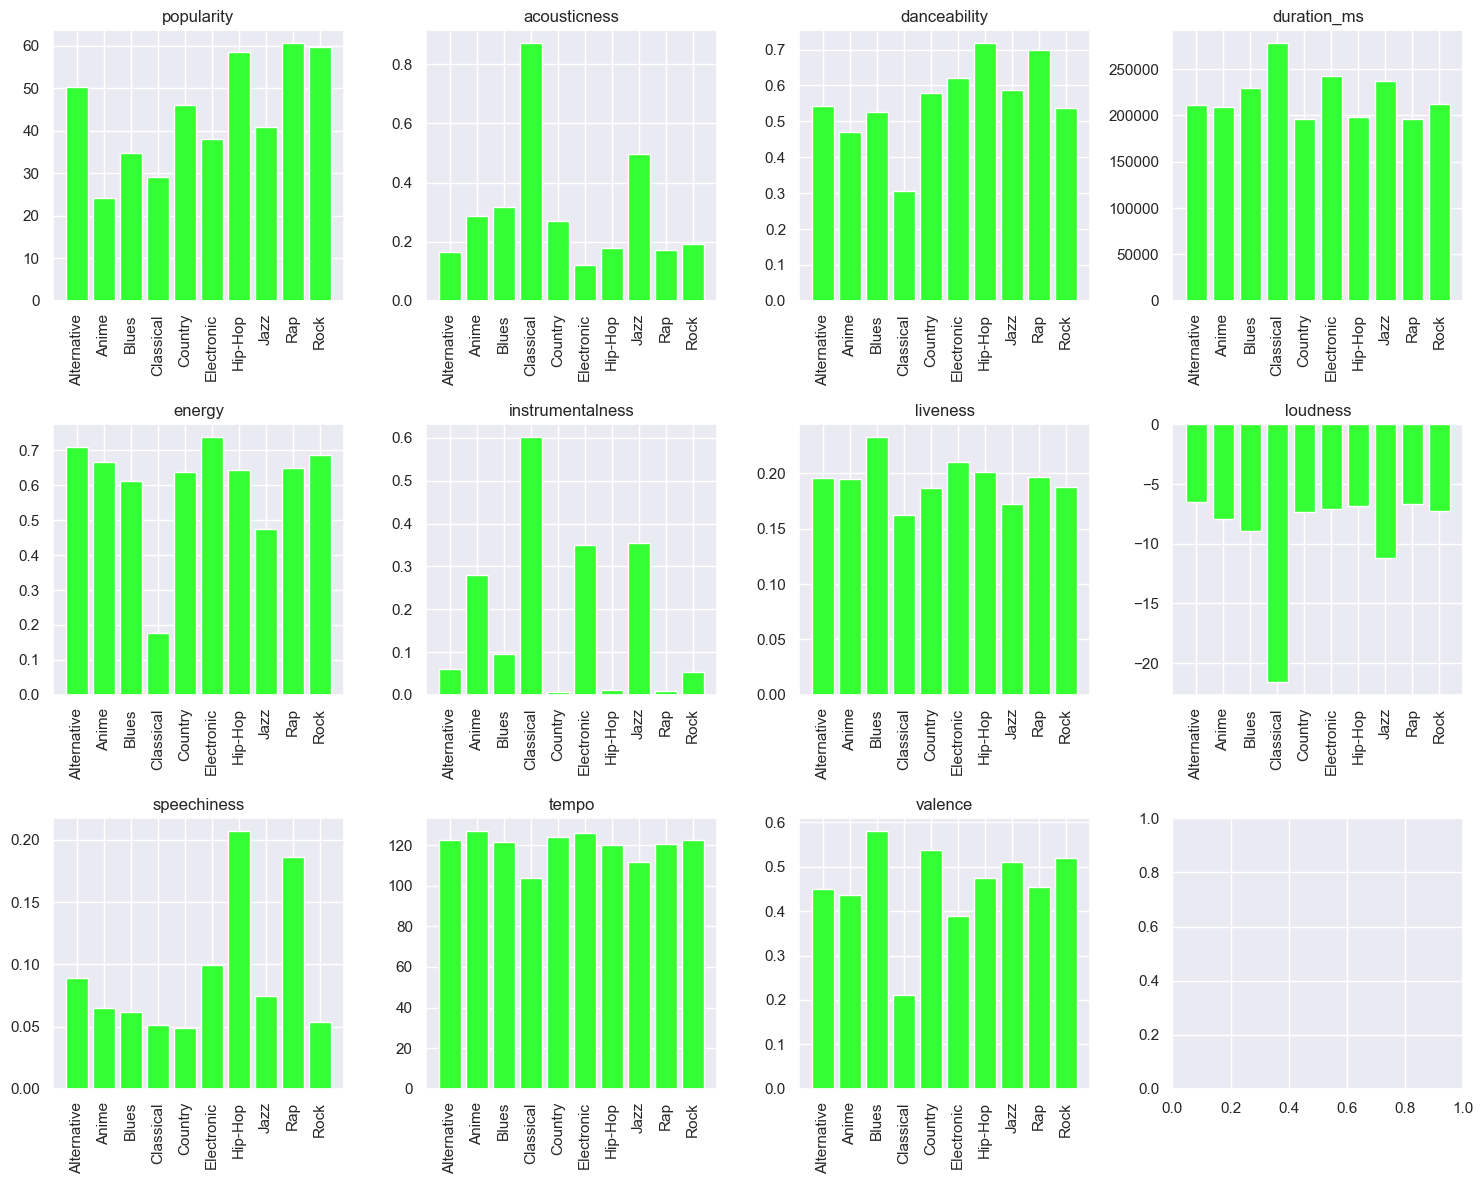

In [314]:
# create the grouped dataframe
grouped = df.groupby("music_genre")[num_cols].mean()



# create the subplot figure
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))

# plot each feature in a separate subplot
for i, col in enumerate(grouped.columns):
     ax = axs[i // 4][i % 4]  # select the appropriate subplot
     ax.bar(grouped.index, grouped[col])
     ax.set_title(col)
     ax.tick_params(axis='x', rotation=90)

# adjust subplot spacing and display the plot
fig.tight_layout()
plt.show() 

## Correlation Matrix for Numerical Features

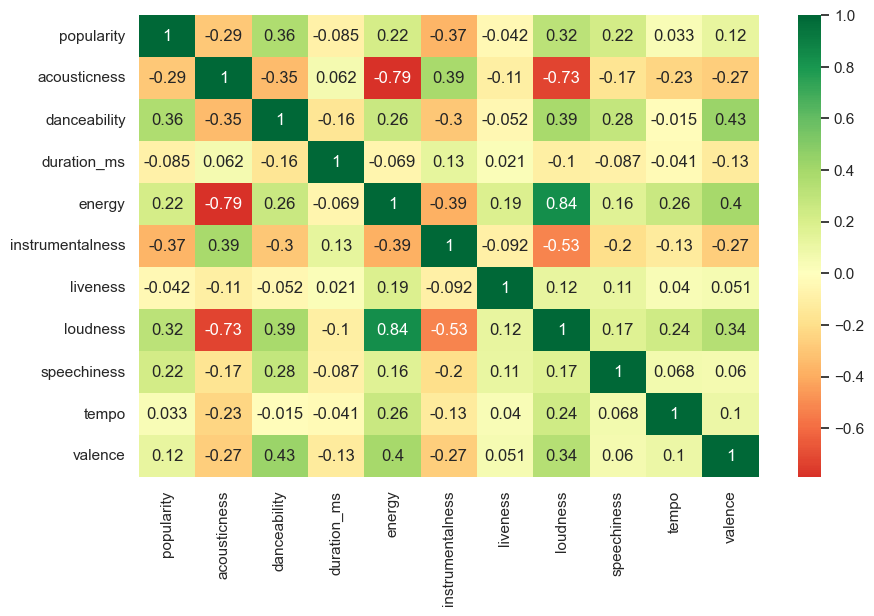

In [315]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(10, 6))
p=sns.heatmap(df[num_cols].corr(), annot=True,cmap='RdYlGn',center=0) 